# Assignment:

1) Pick a dataset.

2) Pose at least three questions related to business or real-world applications of how the data could be used.

3) Create a Jupyter Notebook or Python script and any associated packages you'd like to:

Prepare data:
Gather necessary data to answer your questions
Handle categorical and missing data
Provide insight into the methods you chose and why you chose them
Analyze, Model, and Visualize

Provide a clear connection between your business questions and how the data answers them.

4) Communicate your business insights:
Create a Github repository to share your code and data wrangling/modeling techniques, with a technical audience in mind. Create a blog post to share your questions and insights with a non-technical audience

https://review.udacity.com/#!/rubrics/1507/view


# 1) Pick a dataset

The chosen dataset is the Game Of Thrones Data from https://www.kaggle.com/mylesoneill/game-of-thrones/version/1

# 2) Pose 3 Questions

By looking at header of the data in Kaggle, 3 questions were posed:

* Did winter help the Starks to win their battles?
* Characteristics of deaths?
* What is the distribution of characters lifespan in term of chapters?

## 2a) Did winter help the Starks to win their battles?

To answer this question, the 'battles.csv' was used. It has information about attacking and defending houses for each battle, along with the outcome of each battle ( and whether it was winter during the battle ) 

In [145]:
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import seaborn as sn
import numpy as np

In [31]:
# Gather / Assess
battles = pd.read_csv("battles.csv")
battles.head()

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,...,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,...,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN
3,Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,NaN,NaN,NaN,Lannister,...,1.0,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands,NaN
4,Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,...,1.0,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands,NaN


In [32]:
# Display columns to select relevant columns
battles.columns

Index(['name', 'year', 'battle_number', 'attacker_king', 'defender_king',
       'attacker_1', 'attacker_2', 'attacker_3', 'attacker_4', 'defender_1',
       'defender_2', 'defender_3', 'defender_4', 'attacker_outcome',
       'battle_type', 'major_death', 'major_capture', 'attacker_size',
       'defender_size', 'attacker_commander', 'defender_commander', 'summer',
       'location', 'region', 'note'],
      dtype='object')

In [33]:
# Clean / Analyse
# only select relevant data
battles_relevant = battles[["attacker_1","attacker_2", "attacker_3", "attacker_4", "defender_1", "defender_2", "defender_3", "defender_4", "attacker_outcome", "summer"]]
battles_relevant.head()

,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,defender_2,defender_3,defender_4,attacker_outcome,summer
0,Lannister,NaN,NaN,NaN,Tully,NaN,NaN,NaN,win,1.0
1,Lannister,NaN,NaN,NaN,Baratheon,NaN,NaN,NaN,win,1.0
2,Lannister,NaN,NaN,NaN,Tully,NaN,NaN,NaN,win,1.0
3,Stark,NaN,NaN,NaN,Lannister,NaN,NaN,NaN,loss,1.0
4,Stark,Tully,NaN,NaN,Lannister,NaN,NaN,NaN,win,1.0


In [136]:
# Model  - Extract data into useable metrics
battle2 = pd.DataFrame() 
battle2["isWinter"] = (battles["summer"] == 0)
battle2["DidAttackerWin"] = (battles["attacker_outcome"] == "win")

# Setup metrics that require loops
battle2["StarkIsAttacking"] = False
battle2["StarkIsDefending"] = False

for column in ["attacker_1", "attacker_2", "attacker_3", "attacker_4"]:
    battle2["StarkIsAttacking"] = battles["StarkIsAttacking"] | battles[column].str.contains("Stark", na=False)
    
# defender_3 and defender_4 are not used, as they contain no data
for column in ["defender_1", "defender_2"]:
    battle2["StarkIsDefending"] = battles["StarkIsDefending"] | battles[column].str.contains("Stark", na=False)    

battle2["didStarkWin"] = (battle2["StarkIsAttacking"] & battle2["DidAttackerWin"]) | (battle2["StarkIsDefending"] & ~battle2["DidAttackerWin"])
battle2.head()

,isWinter,DidAttackerWin,StarkIsAttacking,StarkIsDefending
0,False,True,False,False
1,False,True,False,False
2,False,True,False,False
3,False,False,True,False
4,False,True,True,False


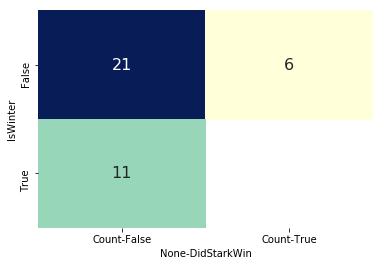

In [141]:
# Visualize
battleCount = battle2.groupby(by=["isWinter", "didStarkWin"]).count().reset_index()[["isWinter", "didStarkWin", "StarkIsAttacking"]]
battleCount.columns = ["IsWinter", "DidStarkWin", "Count"]
battlePivot = battleCount.pivot(index="IsWinter", columns="DidStarkWin", values=["Count"])
sn.heatmap(battlePivot, annot=True, annot_kws={"size": 16}, cmap="YlGnBu", cbar=False);

## Conclusion:
Based on the above confusion Matrix, the winter did not help the Starks win any battles

## 2b) Characteristics of deaths

To answer this question, 'character-predictions.csv'is used. The file contains detailed information about the characters of GoT. This data will be looked at to determine if there are any significant charateristics for the people who died.

In [331]:
# Gather
characterInformation = pd.read_csv("character-predictions.csv")
characterInformation = characterInformation.iloc[:,5:]
print(characterInformation.columns)
characterInformation.head()

Index(['name', 'title', 'male', 'culture', 'dateOfBirth', 'DateoFdeath',
       'mother', 'father', 'heir', 'house', 'spouse', 'book1', 'book2',
       'book3', 'book4', 'book5', 'isAliveMother', 'isAliveFather',
       'isAliveHeir', 'isAliveSpouse', 'isMarried', 'isNoble', 'age',
       'numDeadRelations', 'boolDeadRelations', 'isPopular', 'popularity',
       'isAlive'],
      dtype='object')


,name,title,male,culture,dateOfBirth,DateoFdeath,mother,father,heir,house,...,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
0,Viserys II Targaryen,NaN,1,NaN,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,...,0.0,NaN,0,0,NaN,11,1,1,0.605351,0
1,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,NaN,House Frey,...,NaN,1.0,1,1,97.0,1,1,1,0.896321,1
2,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,NaN,House Swyft,...,NaN,NaN,0,1,NaN,0,0,0,0.267559,1
3,Aemma Arryn,Queen,0,NaN,82.0,105.0,NaN,NaN,NaN,House Arryn,...,NaN,0.0,1,1,23.0,0,0,0,0.183946,0
4,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,NaN,House Santagar,...,NaN,1.0,1,1,29.0,0,0,0,0.043478,1


In [382]:
# Assess / Clean
# Filter to only include dead characters
deadCharacterInformation = characterInformation[~characterInformation["DateoFdeath"].isna()]

In [383]:
# Analyse / Model / Visualize
# Explore missing values to determine which attributes to group the tables by
print(len(deadCharacterInformation))
deadCharacterInformation.isna().sum()

444


name                   0
title                208
male                   0
culture              269
dateOfBirth          310
DateoFdeath            0
mother               444
father               444
heir                 444
house                 69
spouse               367
book1                  0
book2                  0
book3                  0
book4                  0
book5                  0
isAliveMother        444
isAliveFather        444
isAliveHeir          444
isAliveSpouse        367
isMarried              0
isNoble                0
age                  310
numDeadRelations       0
boolDeadRelations      0
isPopular              0
popularity             0
isAlive                0
dtype: int64

house, isMarried, isNoble, male ( gender ) and isPopular is chosen as interesting attributes to group the data by

In [335]:
deadCharacterInformation.head()

,name,title,male,culture,dateOfBirth,DateoFdeath,mother,father,heir,house,...,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
3,Aemma Arryn,Queen,0,NaN,82.0,105.0,NaN,NaN,NaN,House Arryn,...,NaN,0.0,1,1,23.0,0,0,0,0.183946,0
6,Valarr Targaryen,Hand of the King,1,Valyrian,183.0,209.0,NaN,NaN,NaN,House Targaryen,...,NaN,1.0,1,1,26.0,0,0,1,0.431438,0
8,Wilbert,Ser,1,NaN,NaN,298.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0,1,NaN,0,0,0,0.006689,0
10,Will,NaN,1,NaN,NaN,297.0,NaN,NaN,NaN,Night's Watch,...,NaN,NaN,0,0,NaN,0,0,0,0.163880,0
25,Willow Witch-eye,NaN,0,Free Folk,NaN,300.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0,0,NaN,0,0,0,0.050167,0


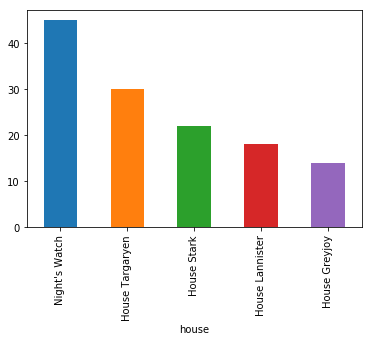

In [387]:
grouped = deadCharacterInformation.groupby("house")["house"].count()
grouped.sort_values(ascending=False).head().plot(kind="bar");

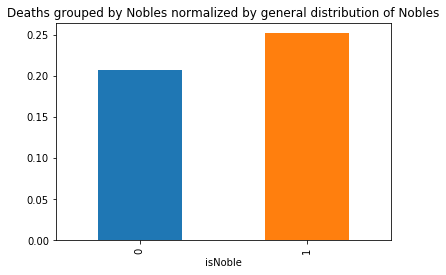

In [388]:
grouped = deadCharacterInformation.groupby("isNoble")["isNoble"].count() / characterInformation.groupby("isNoble")["isNoble"].count()
grouped.plot(kind="bar", title="Deaths grouped by Nobles normalized by general distribution of Nobles");

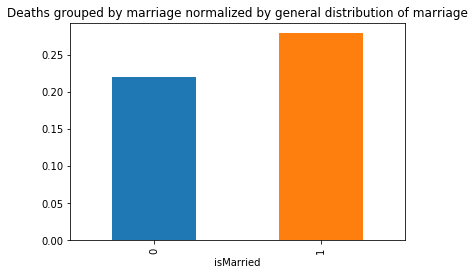

In [390]:
grouped = deadCharacterInformation.groupby("isMarried")["isMarried"].count() / characterInformation.groupby("isMarried")["isMarried"].count()
grouped.plot(kind="bar", title="Deaths grouped by marriage normalized by general distribution of marriage");

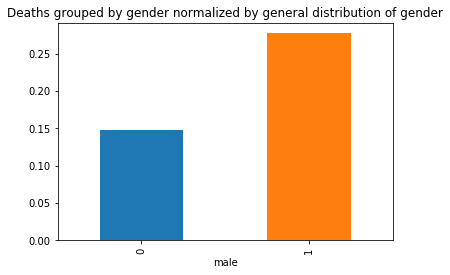

In [391]:
grouped = deadCharacterInformation.groupby("male")["male"].count() / characterInformation.groupby("male")["male"].count()
grouped.plot(kind="bar", title="Deaths grouped by gender normalized by general distribution of gender");

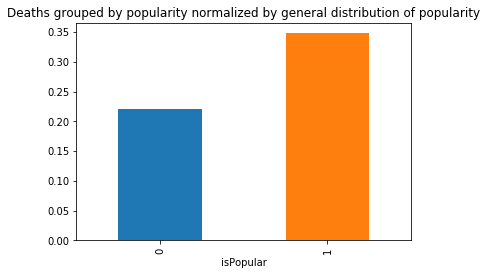

In [392]:
grouped = deadCharacterInformation.groupby("isPopular")["isPopular"].count() / characterInformation.groupby("isPopular")["isPopular"].count()
grouped.plot(kind="bar", title="Deaths grouped by popularity normalized by general distribution of popularity");

## Conclusion:

Looking at the character informtion revealed multiple insights into the distribution of deaths in the GoT universe:
* The Nights Watch, the Targaryans and the Starks suffers the most deaths
* The deaths of married and noble people is proportional to the characters in the universe
* The deaths of male is unpropotional to the gender distrubution in the universe. It is though to be a man!

## 2c) What is the distribution of characters lifespan in term of chapters?
To answer this question, the 'character-deaths.csv' was used. It contains data on which book and chapter a character was introduced and died in. Aditionally, the amount of chapters per book were collected from https://awoiaf.westeros.org/index.php/Chapters_Table_of_contents ( which was also the source of the dataset )

In [395]:
# Gather
externalData = pd.DataFrame()
externalData["Book"] = [1, 2, 3, 4, 5]
externalData["ChaptersPerBook"] = [72, 69, 81, 45, 72]
externalData = externalData.set_index("Book")

In [396]:
deaths = pd.read_csv("character-deaths.csv")
deaths.head()

,Name,Allegiances,Death Year,Book of Death,Death Chapter,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD
0,Addam Marbrand,Lannister,NaN,NaN,NaN,56.0,1,1,1,1,1,1,0
1,Aegon Frey (Jinglebell),None,299.0,3.0,51.0,49.0,1,1,0,0,1,0,0
2,Aegon Targaryen,House Targaryen,NaN,NaN,NaN,5.0,1,1,0,0,0,0,1
3,Adrack Humble,House Greyjoy,300.0,5.0,20.0,20.0,1,1,0,0,0,0,1
4,Aemon Costayne,Lannister,NaN,NaN,NaN,NaN,1,1,0,0,1,0,0


In [397]:
print(f"Users from raw data: {len(deaths)}")

Users from raw data: 917


In [398]:
#Assess / Clean
deaths.isna().sum()

Name                    0
Allegiances             0
Death Year            612
Book of Death         610
Death Chapter         618
Book Intro Chapter     12
Gender                  0
Nobility                0
GoT                     0
CoK                     0
SoS                     0
FfC                     0
DwD                     0
dtype: int64

Two take-aways from the looking at the amount of NaN values:
* A lot of the characters have not died yet
* The Death Year, Book of Death abd Death Chapter do not have same amount of NaN values.

All of the rows with NaN vaues in either 'Book Intro Chapter', 'Death Chapter',  'Book of Death' will be removed, since it will not be possible to calculate the lifespan without this information.

In [399]:
# Melt book number
introBook = []
for index, row in deaths.iterrows():
    if row['GoT'] == 1:
        introBook.append(1) 
    elif row['CoK'] == 1:
        introBook.append(2)
    elif row['SoS'] == 1:
        introBook.append(3)
    elif row['FfC'] == 1:
        introBook.append(4)
    elif row['DwD'] == 1:
        introBook.append(5)
deaths["Book of Intro"] = introBook

In [400]:
# Removal of NaN values, and selection of important columns
requiredInfo = ["Book Intro Chapter", "Death Chapter", "Book of Death", "Book of Intro"]
deathInfo = deaths.dropna(subset=requiredInfo)[requiredInfo]
deathInfo.head()

,Book Intro Chapter,Death Chapter,Book of Death,Book of Intro
1,49.0,51.0,3.0,3
3,20.0,20.0,5.0,5
6,21.0,35.0,4.0,1
10,50.0,56.0,2.0,2
12,18.0,4.0,5.0,2


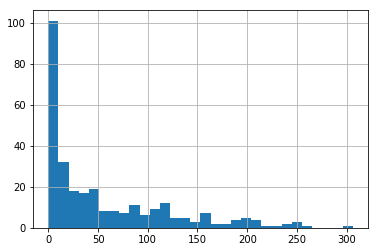

In [402]:
# Analyse / Model / Visualize
# Calculate amount of chapters
chapterList = []
for index, row in deathInfo.iterrows():
    # start with death chapter
    chapters = row["Death Chapter"]
    
    # add all rows from books in between Intro and Death Book ( including intro)
    for b in range(int(row["Book of Intro"]), int(row["Book of Death"])):
        chapters = chapters + externalData.iloc[b]["ChaptersPerBook"]
        
    # Subtract intro chapter, to get total lifespan
    chapters = chapters - row["Book Intro Chapter"]
    chapterList.append(chapters)

deathInfo["lifespan"] = chapterList
deathInfo["lifespan"].hist(bins=30);

In [299]:
deathInfo["lifespan"].describe()

count    294.000000
mean      55.891156
std       66.180293
min        0.000000
25%        3.250000
50%       29.000000
75%       91.000000
max      306.000000
Name: lifespan, dtype: float64

In [310]:
print(f"Characters who die: {len(deathInfo)}")

Characters who die: 294


## Conclusion:

The distribution of when people die is heavily leaning towards the left. The median lifespan of the death characters is rougly 30, illustrating just how many people die shortly after being introduced.
